<a href="https://colab.research.google.com/github/Bianca-Garciaf/Analise-de-dados-com-python/blob/main/Machine_Learning_para_sequ%C3%AAncias_virais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Trabalho final do módulo de Bioestatística do projeto Baré.##

Bolsista:

*   Bianca Garcia




## Machine Learning para sequências virais: HCV( hcv.aln.fasta )


No trabalho final do módulo de Bioestatística optamos por trabalhar com o vírus da Hépatite C, correspondente ao arquivo hcv.aln.fasta.
A príncipio, foi pensado em trabalhar com o hep-b-alignment.fasta, mas o arquivo estava corrompido.

Para melhor compreensão do código, foi optado por escrever este relátorio no próprio nootebook, assim podendo separar em tópicos o projeto e relatar o processo de construção de cada etapa.

### 1. Pré-processamento

Nesse prímeiro tópico estamos fazendo a intalação e os imports das bibliotecas escolhidas

In [ ]:
!pip install biopython

In [ ]:
!pip install -U scikit-learn

In [ ]:
!pip install skops

In [ ]:
import pandas as pd
import skops.io as sio
import matplotlib.pyplot as plt

from sklearn.model_selection import GridSearchCV
from Bio import SeqIO
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE


A função **read_fasta** lê e extrai os dados do arquivo, tomando como base que a posição 0 está se referindo ao trecho do head que contém informações sobre o génotipo. Já a **one_hot_encode_sequences** converte as sequências em one-hot anconding.



In [ ]:
def read_fasta(file_path):
    sequences = []
    labels = []
    for record in SeqIO.parse(file_path, "fasta"):
        header = record.id.split('.')
        label = header[0]
        sequences.append(str(record.seq))
        labels.append(label)
    return sequences, labels

In [ ]:
def one_hot_encode_sequences(sequences):
    encoder = OneHotEncoder()
    sequence_matrix = [list(seq) for seq in sequences]
    encoder.fit(sequence_matrix)
    one_hot_encoded = encoder.transform(sequence_matrix).toarray()
    return one_hot_encoded



Algumas bibliotecas que valem ser ressaltadas é a pydrive que se baseia na API do Google Drive e a gdown que baixa arquivos utilizando o link do Drive.

Durante o teste não esquecer de fazer upload do arquivo e colocar seu caminho nesse trecho.

Além disso, essa é a principal parte deste priemiro tópico, pois é aqui que fazemos o carregamento e o pré - processamento de todos os dados que seram usados na fase seguinto destetrabalha. Sendo de suma importância que se tenha um cuidado com a manipulação dos dados.


In [ ]:
file_path = "/content/fasta/hcv.aln (1).fasta"
sequences, labels = read_fasta(file_path)
X = one_hot_encode_sequences(sequences)
le = LabelEncoder()
y = le.fit_transform(labels)


### 2. Preparo de Dados

Divisão dos dados em conjuntos para o treinamento de teste

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
X_train.shape

(376, 28702)

In [ ]:
X_test.shape

(95, 28702)

In [ ]:
y_train.shape

(376,)

In [ ]:
y_test.shape

(95,)

### 3. Redução de dimensionalidade

Durante essa etapa usaremos os métodos de PCA (Principal Component Analysis) e t-SNE(t-Distributed Stochastic Neighbor Embedding. Este último método foi escobtrado enquanto pesquisava sobre redução de dimensionalidade, ele surge como uma forma de visualização mais detalhada.

In [ ]:

def plot_2d(X, y, title):
    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', alpha=0.7)
    plt.legend(handles=scatter.legend_elements()[0], labels=list(le.classes_), bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.title(title)
    plt.xlabel('Componente 1')
    plt.ylabel('Componente 2')
    plt.show()

Redução de dimensionalidade usando PCA

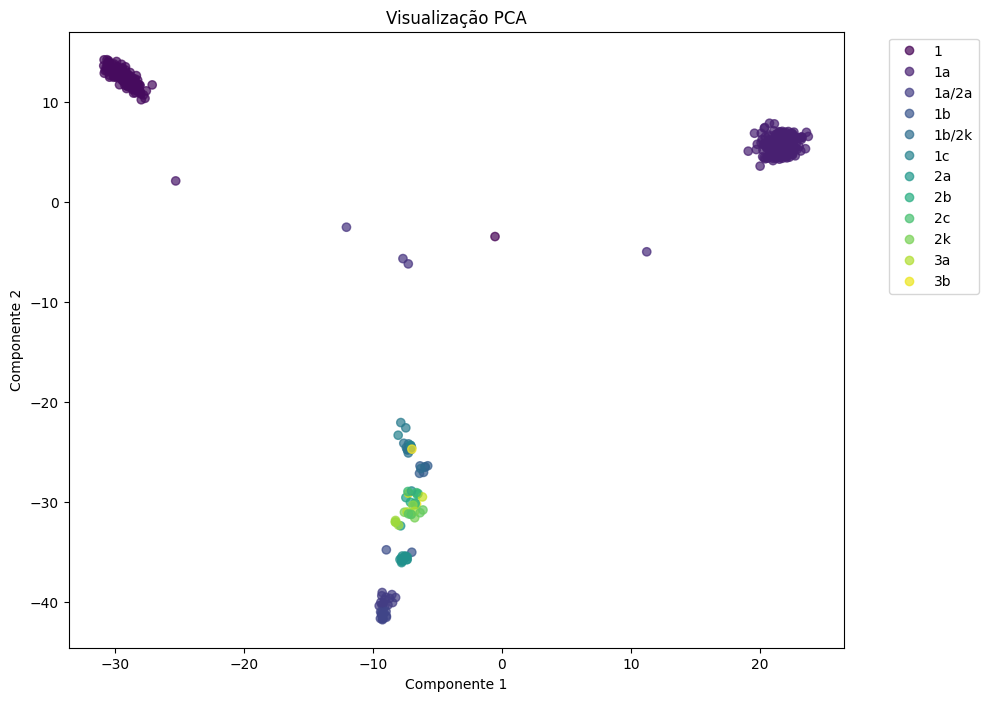

In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
plot_2d(X_pca, y, 'Visualização PCA')

Redução de dimensionalidade usando t-SNE

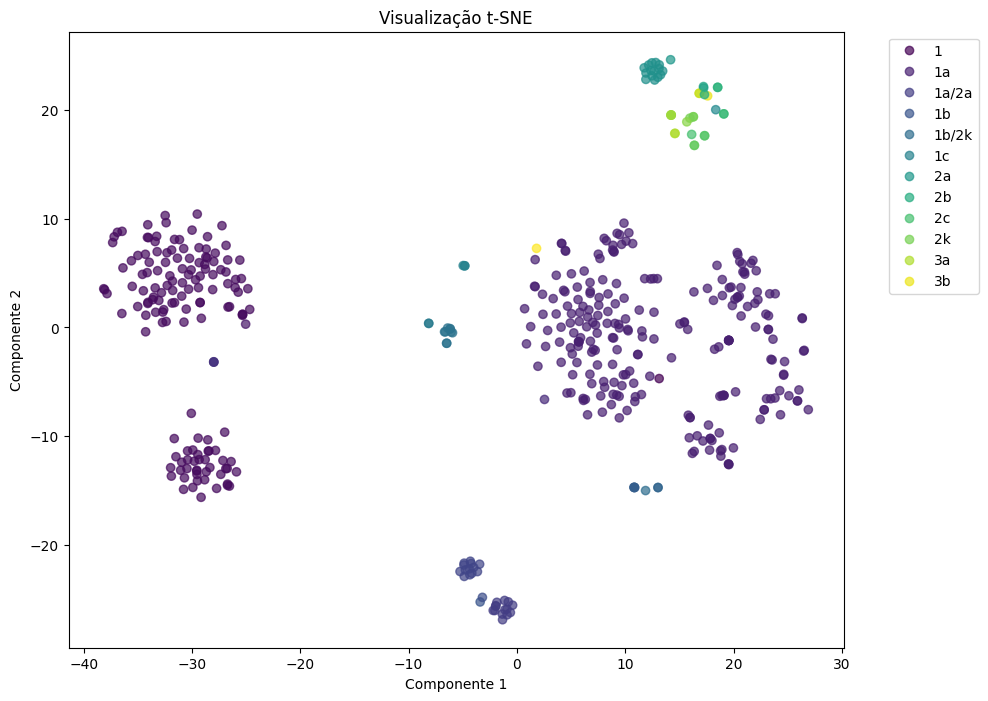

In [ ]:
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X)
plot_2d(X_tsne, y, 'Visualização t-SNE')

### 4. Classificador

Nessa etapa construimos um modelo inicial de machine learning e o treinamos.

In [ ]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

### 5. Avaliação do modelo

Nessa tópico avaliamos o modelo treinado anteriomente usando tanto o teste de acurácia quanto de matriz de confusão.

Isso se dá por conta do teste de acurácia acabar dando um resultado que tende a ser acima do real, por isso usamos dois para ter certeza sobre a qualidade do modelo.

In [ ]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

Métrica de acurácia

In [ ]:
print(f"Acurácia: {accuracy}")

Acurácia: 0.968421052631579


Geração da matriz de confusão

In [ ]:
print("Matriz de Confusão:")
print(conf_matrix)

Matriz de Confusão:
[[33  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 33  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  5  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  4  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  2  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  2  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  5  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0]
 [ 0  0  0  0  0  0 

### 6. Seleção de modelos e otimização de hiperparâmetros

Nessa última etapa estamos ajustando os prâmetros do modelo para encontrar qual pode proprocionar o melhor desempenho. Pensando nisso, decidimos usar o GridSearch da biblioteca sklearn.model_selection, pois ele faz uma busca na grade de hiperparâmetros e faz a validação cruzada.

Lembrando que trabalhamos com ela também por conta do volume de dados ser relativamente pequeno

In [ ]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [ ]:
rf = RandomForestClassifier(random_state=42)


Configuração do GridSearchCV com validação cruzada

In [ ]:
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2)


In [ ]:
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 108 candidates, totalling 540 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             verbose=2)

Melhor modelo encontrado pelo GridSearchCV

In [ ]:
best_model = grid_search.best_estimator_
print(f"Melhores hiperparâmetros: {grid_search.best_params_}")
print(f"Melhor acurácia: {grid_search.best_score_}")


Melhores hiperparâmetros: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Melhor acurácia: 0.9495087719298247


Avaliação do melhor modelo no conjunto de teste, processo igual ao usado no tópico 5

In [ ]:
y_test_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_conf_matrix = confusion_matrix(y_test, y_test_pred)
print(f"Acurácia no conjunto de teste com o melhor modelo: {test_accuracy}")
print("Matriz de Confusão no conjunto de teste com o melhor modelo:")
print(test_conf_matrix)


Acurácia no conjunto de teste com o melhor modelo: 0.968421052631579
Matriz de Confusão no conjunto de teste com o melhor modelo:
[[33  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 33  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  5  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  4  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  2  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  2  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  5  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  

Avaliação o melhor modelo no conjunto de treinamento, processo igual ao usado no tópico 5

In [ ]:
y_train_pred = best_model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
train_conf_matrix = confusion_matrix(y_train, y_train_pred)

print(f"Acurácia no conjunto de treinamento com o melhor modelo: {train_accuracy}")
print("Matriz de Confusão no conjunto de treinamento com o melhor modelo:")
print(train_conf_matrix)


Acurácia no conjunto de treinamento com o melhor modelo: 1.0
Matriz de Confusão no conjunto de treinamento com o melhor modelo:
[[  1   0   0 ...   0   0   0]
 [  0 110   0 ...   0   0   0]
 [  0   0   1 ...   0   0   0]
 ...
 [  0   0   0 ...   1   0   0]
 [  0   0   0 ...   0   1   0]
 [  0   0   0 ...   0   0   1]]


### 6. Salvamento de Modelo em disco

Por último, salvamos o melhor modelo treinado no disco.

In [ ]:
model_file = "hcv_best_model.skops"
sio.dump(best_model, model_file)

